In [1]:
# Developed by Rishikesh Rajendra Pote
# Used Python 3 and Anaconda Jupyter Notebook For Creating The Poject
# In these Project I have approached The Dataset, the data dictionary provided by the team
# The Steps followed by me throughout the project were as follows
# 1) Understanding the Dataset
# 2) Importing The required Models 
# 3) Data Cleaning 
# 4) Data Visualization
# 5) Feature Engineering
# 6) Model Building
# 7) Prediction
# 8) Checking the Accuracy
# Exploratory Data Analysis (EDA)
# Data Cleaning
# Variable Transformations
# Plots to study trends
# Feature engineering and Variable Selection
# Model Building and Validation
# Preprocessing
# Model Building, testing and validation
# Model selection
# I have used Boosting method Extreme Gradient Boosting(XGBoost) for Prediciting due to its speed and prediction.


In [2]:
# Importing of those libraries in the block which were required in the project
import numpy as np
import pandas as pd
import seaborn as sns
import scikitplot as skplt
from scipy import stats
import scikitplot as skplt
from math import floor,ceil
import statsmodels.api as sm
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from IPython.display import display, HTML
pd.set_option('display.max_columns', None)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score

import warnings
warnings.simplefilter('ignore',DeprecationWarning)

In [3]:
# specigying styles and colors through this function
def style_specific_cell(x):

    color_thresh = 'background-color: lightpink'
    
    df_color = pd.DataFrame('', index=x.index, columns=x.columns)
    rows_number=len(x.index)
    column_number=len(x.columns)
    for r in range(0,rows_number): 
        for c in range(0,column_number):
            try:
                val=float(x.iloc[r, c])
                if x.iloc[r, 0]=="Percentage":
                    if val<10:
                        df_color.iloc[r, c]=color_thresh
            except:
                pass
            
    return df_color

def style_stats_specific_cell(x):

    color_thresh = 'background-color: lightpink'
    
    df_color = pd.DataFrame('', index=x.index, columns=x.columns)
    rows_number=len(x.index)
    for r in range(0,rows_number):
        try:
            val=(x.iloc[r, 1])
            if val>0.05:
                df_color.iloc[r, 1]=color_thresh
        except:
            pass
    return df_color

In [4]:
#Reading Dataset from the computer
df=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data",sep=" ",header=None)

#specifying the headers for the raw data
headers=["Status of existing checking account","Duration in month","Credit history",\
         "Purpose","Credit amount","Savings account/bonds","Present employment since",\
         "Installment rate in percentage of disposable income","Personal status and sex",\
         "Other debtors / guarantors","Present residence since","Property","Age in years",\
        "Other installment plans","Housing","Number of existing credits at this bank",\
        "Job","Number of people being liable to provide maintenance for","Telephone","foreign worker","Cost Matrix(Risk)"]
df.columns=headers
df.to_csv("german_data_credit_cat.csv",index=False) #save as csv file

# Variable Transformations
# To make a modelling ready dataset, we have to transform a few variables
#for structuring only and working according the data provided in data dictionary

Status_of_existing_checking_account={'A14':"no checking account",'A11':"<0 DM", 'A12': "0 <= <200 DM",'A13':">= 200 DM "}
df["Status of existing checking account"]=df["Status of existing checking account"].map(Status_of_existing_checking_account)

Credit_history={"A34":"critical account","A33":"delay in paying off","A32":"existing credits paid back duly till now","A31":"all credits at this bank paid back duly","A30":"no credits taken"}
df["Credit history"]=df["Credit history"].map(Credit_history)

Purpose={"A40" : "car (new)", "A41" : "car (used)", "A42" : "furniture/equipment", "A43" :"radio/television" , "A44" : "domestic appliances", "A45" : "repairs", "A46" : "education", 'A47' : 'vacation','A48' : 'retraining','A49' : 'business','A410' : 'others'}
df["Purpose"]=df["Purpose"].map(Purpose)

Saving_account={"A65" : "no savings account","A61" :"<100 DM","A62" : "100 <= <500 DM","A63" :"500 <= < 1000 DM", "A64" :">= 1000 DM"}
df["Savings account/bonds"]=df["Savings account/bonds"].map(Saving_account)

Present_employment={'A75':">=7 years", 'A74':"4<= <7 years",  'A73':"1<= < 4 years", 'A72':"<1 years",'A71':"unemployed"}
df["Present employment since"]=df["Present employment since"].map(Present_employment)

Personal_status_and_sex={ 'A95':"female:single",'A94':"male:married/widowed",'A93':"male:single", 'A92':"female:divorced/separated/married", 'A91':"male:divorced/separated"}
df["Personal status and sex"]=df["Personal status and sex"].map(Personal_status_and_sex)

Other_debtors_guarantors={'A101':"none", 'A102':"co-applicant", 'A103':"guarantor"}
df["Other debtors / guarantors"]=df["Other debtors / guarantors"].map(Other_debtors_guarantors)

Property={'A121':"real estate", 'A122':"savings agreement/life insurance", 'A123':"car or other", 'A124':"unknown / no property"}
df["Property"]=df["Property"].map(Property)

Other_installment_plans={'A143':"none", 'A142':"store", 'A141':"bank"}
df["Other installment plans"]=df["Other installment plans"].map(Other_installment_plans)

Housing={'A153':"for free", 'A152':"own", 'A151':"rent"}
df["Housing"]=df["Housing"].map(Housing)

Job={'A174':"management/ highly qualified employee", 'A173':"skilled employee / official", 'A172':"unskilled - resident", 'A171':"unemployed/ unskilled  - non-resident"}
df["Job"]=df["Job"].map(Job)

Telephone={'A192':"yes", 'A191':"none"}
df["Telephone"]=df["Telephone"].map(Telephone)

foreign_worker={'A201':"yes", 'A202':"no"}
df["foreign worker"]=df["foreign worker"].map(foreign_worker)

risk={1:"Good Risk", 2:"Bad Risk"}
df["Cost Matrix(Risk)"]=df["Cost Matrix(Risk)"].map(risk)

In [5]:
df.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Cost Matrix(Risk)
0,<0 DM,6,critical account,radio/television,1169,no savings account,>=7 years,4,male:single,none,4,real estate,67,none,own,2,skilled employee / official,1,yes,yes,Good Risk
1,0 <= <200 DM,48,existing credits paid back duly till now,radio/television,5951,<100 DM,1<= < 4 years,2,female:divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes,Bad Risk
2,no checking account,12,critical account,education,2096,<100 DM,4<= <7 years,2,male:single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,Good Risk
3,<0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,<100 DM,4<= <7 years,2,male:single,guarantor,4,savings agreement/life insurance,45,none,for free,1,skilled employee / official,2,none,yes,Good Risk
4,<0 DM,24,delay in paying off,car (new),4870,<100 DM,1<= < 4 years,3,male:single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,Bad Risk


In [6]:
# data types of different observations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Status of existing checking account                         1000 non-null object
Duration in month                                           1000 non-null int64
Credit history                                              1000 non-null object
Purpose                                                     1000 non-null object
Credit amount                                               1000 non-null int64
Savings account/bonds                                       1000 non-null object
Present employment since                                    1000 non-null object
Installment rate in percentage of disposable income         1000 non-null int64
Personal status and sex                                     1000 non-null object
Other debtors / guarantors                                  1000 non-null object
Present residence since                                     1000 non-null int64
Propert

In [7]:
column_names=df.columns.tolist()
column_names.remove("Credit amount") #numerical variable
column_names.remove("Age in years") #numerical variable
column_names.remove("Duration in month") #numerical variable
#----------------------------------------------------------------------------------------

column_names_cat={}
for name in column_names:
    column_names_cat[name]=len(df[name].unique().tolist())

    marginal_report_cluster={}
for itr in range(0,np.asarray(list(column_names_cat.values())).max()+1):
    if [k for k,v in column_names_cat.items() if v == itr]:
        marginal_report_cluster[itr]=[k for k,v in column_names_cat.items() if v == itr]

#----------------------------------------------------------------------------------------
for key in marginal_report_cluster.keys():
    marginal_percentage_report=[]
    for name in sorted(marginal_report_cluster[key]):
        data=pd.crosstab(df[name],columns=["Percentage"]).apply(lambda r: (round((r/r.sum())*100,2)), axis=0).reset_index()
        data.columns=[name,"Percentage"]
        data=data.transpose().reset_index()
        [marginal_percentage_report.append(x) for x in data.values.tolist()]
        options=[]
    marginal_percentage_report=pd.DataFrame(marginal_percentage_report)
    [options.append("Category Option "+str(itr)) for itr in range(1,len(marginal_percentage_report.columns))]
    marginal_percentage_report.columns=["Attribute"]+options
    display(marginal_percentage_report.style.apply(style_specific_cell, axis=None))
    

,Attribute,Category Option 1,Category Option 2
0,Cost Matrix(Risk),Bad Risk,Good Risk
1,Percentage,30,70
2,Number of people being liable to provide maintenance for,1,2
3,Percentage,84.5,15.5
4,Telephone,none,yes
5,Percentage,59.6,40.4
6,foreign worker,no,yes
7,Percentage,3.7,96.3


,Attribute,Category Option 1,Category Option 2,Category Option 3
0,Housing,for free,own,rent
1,Percentage,10.8,71.3,17.9
2,Other debtors / guarantors,co-applicant,guarantor,none
3,Percentage,4.1,5.2,90.7
4,Other installment plans,bank,none,store
5,Percentage,13.9,81.4,4.7


,Attribute,Category Option 1,Category Option 2,Category Option 3,Category Option 4
0,Installment rate in percentage of disposable income,1,2,3,4
1,Percentage,13.6,23.1,15.7,47.6
2,Job,management/ highly qualified employee,skilled employee / official,unemployed/ unskilled - non-resident,unskilled - resident
3,Percentage,14.8,63,2.2,20
4,Number of existing credits at this bank,1,2,3,4
5,Percentage,63.3,33.3,2.8,0.6
6,Personal status and sex,female:divorced/separated/married,male:divorced/separated,male:married/widowed,male:single
7,Percentage,31,5,9.2,54.8
8,Present residence since,1,2,3,4
9,Percentage,13,30.8,14.9,41.3


,Attribute,Category Option 1,Category Option 2,Category Option 3,Category Option 4,Category Option 5
0,Credit history,all credits at this bank paid back duly,critical account,delay in paying off,existing credits paid back duly till now,no credits taken
1,Percentage,4.9,29.3,8.8,53,4
2,Present employment since,1<= < 4 years,4<= <7 years,<1 years,>=7 years,unemployed
3,Percentage,33.9,17.4,17.2,25.3,6.2
4,Savings account/bonds,100 <= <500 DM,500 <= < 1000 DM,<100 DM,>= 1000 DM,no savings account
5,Percentage,10.3,6.3,60.3,4.8,18.3


,Attribute,Category Option 1,Category Option 2,Category Option 3,Category Option 4,Category Option 5,Category Option 6,Category Option 7,Category Option 8,Category Option 9,Category Option 10
0,Purpose,business,car (new),car (used),domestic appliances,education,furniture/equipment,others,radio/television,repairs,retraining
1,Percentage,9.7,23.4,10.3,1.2,5,18.1,1.2,28,2.2,0.9


In [8]:
df=pd.read_csv("german_data_credit_cat.csv")
number_of_credit={1:1,2:2,3:2,4:2}
df["Number of existing credits at this bank"]=df["Number of existing credits at this bank"].map(number_of_credit)

Status_of_existing_checking_account={'A14':"no checking account",'A11':"<0 DM", 'A12': ">0 DM",'A13':">0 DM"}
df["Status of existing checking account"]=df["Status of existing checking account"].map(Status_of_existing_checking_account)

Credit_history={"A34":"critical account/delay in paying off","A33":"critical account/delay in paying off","A32":"all credit / existing credits paid back duly till now","A31":"all credit / existing credits paid back duly till now","A30":"no credits taken"}
df["Credit history"]=df["Credit history"].map(Credit_history)




Purpose={"A40" : "car (new)", "A41" : "car (used)", "A42" : "Home Related", "A43" :"Home Related" , "A44" : "Home Related", "A45" : "Home Related", "A46" : "others", 'A47' : 'others','A48' : 'others','A49' : 'others','A410' : 'others'}
df["Purpose"]=df["Purpose"].map(Purpose)

Saving_account={"A65" : "no savings account","A61" :"<100 DM","A62" : "<500 DM","A63" :">500 DM", "A64" :">500 DM"}
df["Savings account/bonds"]=df["Savings account/bonds"].map(Saving_account)



           
Present_employment={'A75':">=7 years", 'A74':"4<= <7 years",  'A73':"1<= < 4 years", 'A72':"<1 years",'A71':"<1 years"}
df["Present employment since"]=df["Present employment since"].map(Present_employment)




Personal_status_and_sex={ 'A95':"female",'A94':"male",'A93':"male", 'A92':"female", 'A91':"male"}
df["Personal status and sex"]=df["Personal status and sex"].map(Personal_status_and_sex)


Other_debtors_guarantors={'A101':"none", 'A102':"co-applicant/guarantor", 'A103':"co-applicant/guarantor"}
df["Other debtors / guarantors"]=df["Other debtors / guarantors"].map(Other_debtors_guarantors)


Property={'A121':"real estate", 'A122':"savings agreement/life insurance", 'A123':"car or other", 'A124':"unknown / no property"}
df["Property"]=df["Property"].map(Property)




Other_installment_plans={'A143':"none", 'A142':"bank/store", 'A141':"bank/store"}
df["Other installment plans"]=df["Other installment plans"].map(Other_installment_plans)

Housing={'A153':"for free", 'A152':"own", 'A151':"rent"}
df["Housing"]=df["Housing"].map(Housing)




Job={'A174':"employed", 'A173':"employed", 'A172':"unemployed", 'A171':"unemployed"}
df["Job"]=df["Job"].map(Job)

Telephone={'A192':"yes", 'A191':"none"}
df["Telephone"]=df["Telephone"].map(Telephone)



foreign_worker={'A201':"yes", 'A202':"no"}
df["foreign worker"]=df["foreign worker"].map(foreign_worker)



risk={1:"Good Risk", 2:"Bad Risk"}
df["Cost Matrix(Risk)"]=df["Cost Matrix(Risk)"].map(risk)

In [9]:
column_names=df.columns.tolist()
column_names.remove("Credit amount") #numerical variable
column_names.remove("Age in years") #numerical variable
column_names.remove("Duration in month") #numerical variable
#----------------------------------------------------------------------------------------

column_names_cat={}
for name in column_names:
    column_names_cat[name]=len(df[name].unique().tolist())

    marginal_report_cluster={}
for itr in range(0,np.asarray(list(column_names_cat.values())).max()+1):
    if [k for k,v in column_names_cat.items() if v == itr]:
        marginal_report_cluster[itr]=[k for k,v in column_names_cat.items() if v == itr]

#----------------------------------------------------------------------------------------
for key in marginal_report_cluster.keys():
    marginal_percentage_report=[]
    for name in sorted(marginal_report_cluster[key]):
        data=pd.crosstab(df[name],columns=["Percentage"]).apply(lambda r: (round((r/r.sum())*100,2)), axis=0).reset_index()
        data.columns=[name,"Percentage"]
        data=data.transpose().reset_index()
        [marginal_percentage_report.append(x) for x in data.values.tolist()]
        options=[]
    marginal_percentage_report=pd.DataFrame(marginal_percentage_report)
    [options.append("Category Option "+str(itr)) for itr in range(1,len(marginal_percentage_report.columns))]
    marginal_percentage_report.columns=["Attribute"]+options
    display(marginal_percentage_report.style.apply(style_specific_cell, axis=None))
    

,Attribute,Category Option 1,Category Option 2
0,Cost Matrix(Risk),Bad Risk,Good Risk
1,Percentage,30,70
2,Job,employed,unemployed
3,Percentage,77.8,22.2
4,Number of existing credits at this bank,1,2
5,Percentage,63.3,36.7
6,Number of people being liable to provide maintenance for,1,2
7,Percentage,84.5,15.5
8,Other debtors / guarantors,co-applicant/guarantor,none
9,Percentage,9.3,90.7


,Attribute,Category Option 1,Category Option 2,Category Option 3
0,Credit history,all credit / existing credits paid back duly till now,critical account/delay in paying off,no credits taken
1,Percentage,57.9,38.1,4
2,Housing,for free,own,rent
3,Percentage,10.8,71.3,17.9
4,Status of existing checking account,<0 DM,>0 DM,no checking account
5,Percentage,27.4,33.2,39.4


,Attribute,Category Option 1,Category Option 2,Category Option 3,Category Option 4
0,Installment rate in percentage of disposable income,1,2,3,4
1,Percentage,13.6,23.1,15.7,47.6
2,Present employment since,1<= < 4 years,4<= <7 years,<1 years,>=7 years
3,Percentage,33.9,17.4,23.4,25.3
4,Present residence since,1,2,3,4
5,Percentage,13,30.8,14.9,41.3
6,Property,car or other,real estate,savings agreement/life insurance,unknown / no property
7,Percentage,33.2,28.2,23.2,15.4
8,Purpose,Home Related,car (new),car (used),others
9,Percentage,49.5,23.4,10.3,16.8


In [10]:
df[["Credit amount","Age in years","Duration in month"]].describe()

,Credit amount,Age in years,Duration in month
count,1000.000000,1000.000000,1000.000000
mean,3271.258000,35.546000,20.903000
std,2822.736876,11.375469,12.058814
min,250.000000,19.000000,4.000000
25%,1365.500000,27.000000,12.000000
50%,2319.500000,33.000000,18.000000
75%,3972.250000,42.000000,24.000000
max,18424.000000,75.000000,72.000000


In [11]:
# visualization of the data
# Exploratory Data Analysis (EDA)
def visualize_distribution(attr):
    good_risk_df = df[df["Cost Matrix(Risk)"]=="Good Risk"]
    bad_risk_df = df[df["Cost Matrix(Risk)"]=="Bad Risk"]
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    attr_good_risk_df = good_risk_df[[attr, 'Cost Matrix(Risk)']].groupby(attr).count()
    attr_bad_risk_df = bad_risk_df[[attr, 'Cost Matrix(Risk)']].groupby(attr).count()
    ax[0].barh( attr_good_risk_df['Cost Matrix(Risk)'].index.tolist(), attr_good_risk_df['Cost Matrix(Risk)'].tolist(), align='center', color="#5975A4")
    ax[1].barh( attr_bad_risk_df['Cost Matrix(Risk)'].index.tolist(), attr_bad_risk_df['Cost Matrix(Risk)'].tolist(), align='center', color="#B55D60")
    ax[0].set_title('Good Risk')
    ax[1].set_title('Bad Risk')
    ax[0].invert_xaxis()
    ax[1].yaxis.tick_right()
    
    num_para_change=["Present residence since","Number of existing credits at this bank","Installment rate in percentage of disposable income","Number of people being liable to provide maintenance for"]
    if attr in num_para_change:
        for i, v in enumerate(attr_good_risk_df['Cost Matrix(Risk)'].tolist()):
            ax[0].text(v+15, i+1, str(v), color='black')
        for i, v in enumerate(attr_bad_risk_df['Cost Matrix(Risk)'].tolist()):
            ax[1].text(v+2, i+1, str(v), color='black')
    else:
        for i, v in enumerate(attr_good_risk_df['Cost Matrix(Risk)'].tolist()):
            ax[0].text(v+25, i + .05, str(v), color='black')
        for i, v in enumerate(attr_bad_risk_df['Cost Matrix(Risk)'].tolist()):
            ax[1].text(v+1, i + .05, str(v), color='black')
    plt.suptitle(attr)
    plt.tight_layout()
    plt.show()

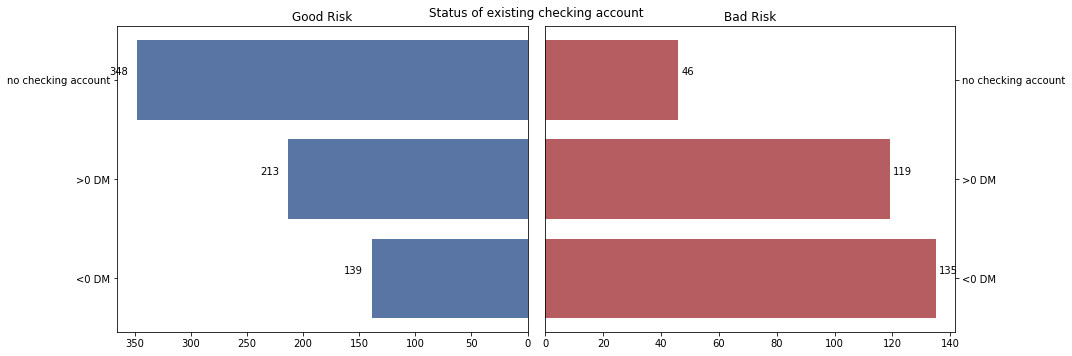

In [12]:
visualize_distribution("Status of existing checking account")

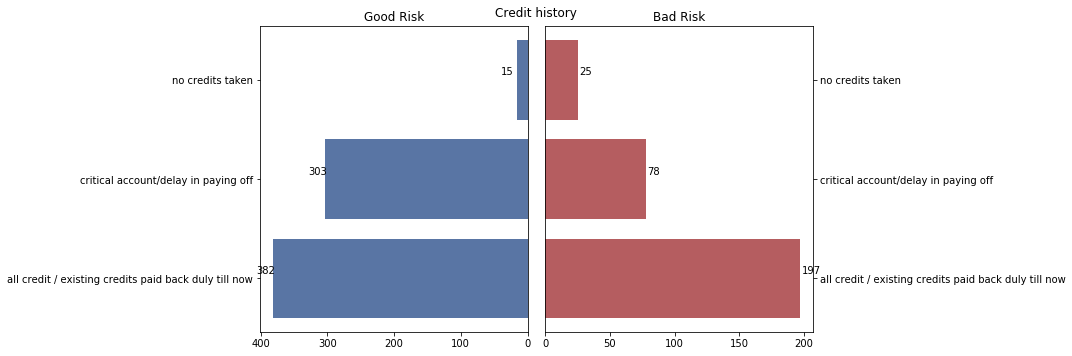

In [13]:
visualize_distribution("Credit history")

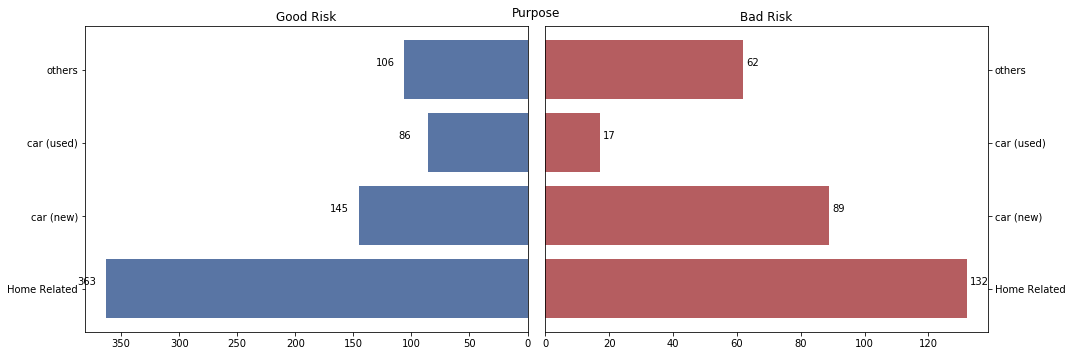

In [14]:
visualize_distribution("Purpose")

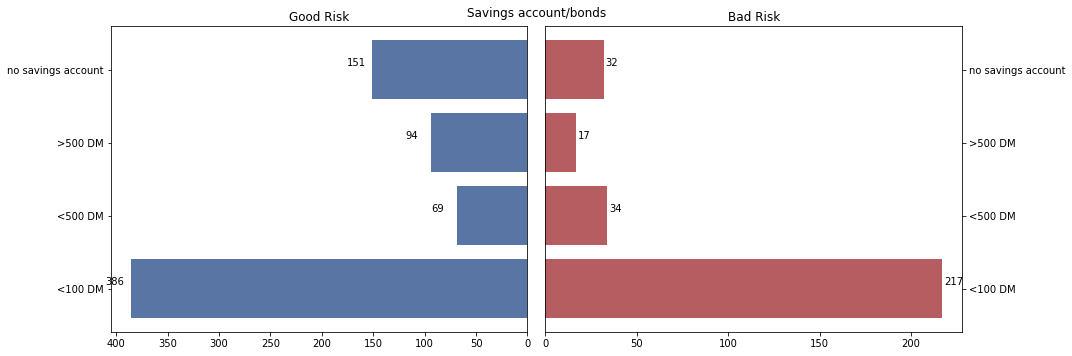

In [15]:
visualize_distribution("Savings account/bonds")

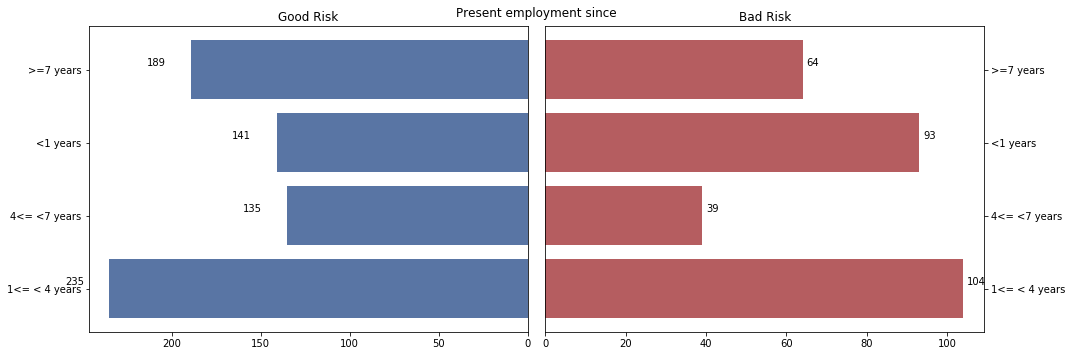

In [16]:
visualize_distribution("Present employment since")

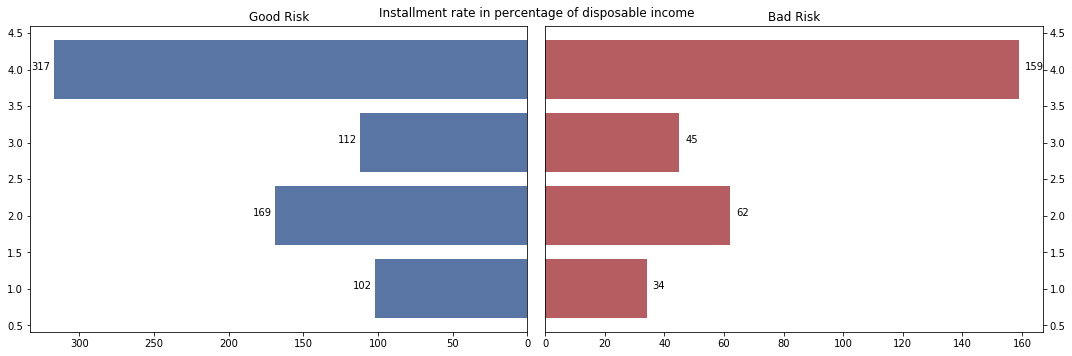

In [17]:
visualize_distribution("Installment rate in percentage of disposable income")

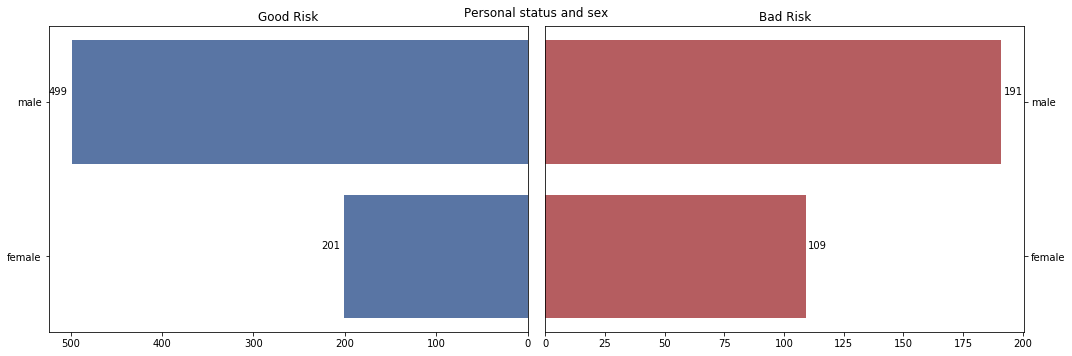

In [18]:
visualize_distribution("Personal status and sex")

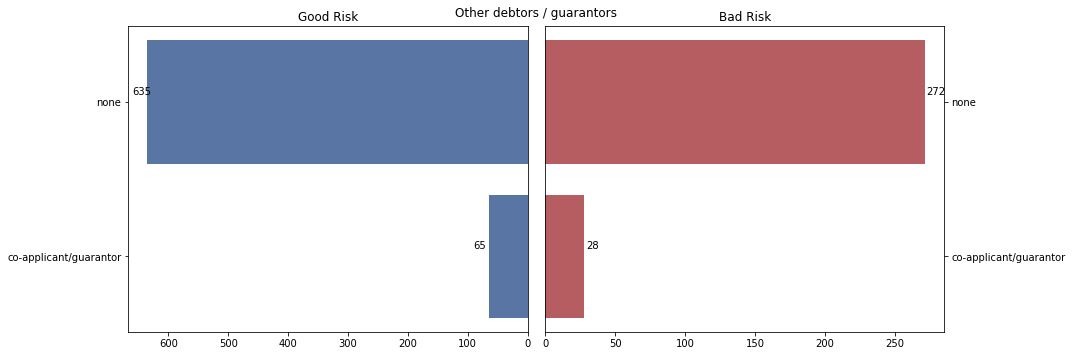

In [19]:
visualize_distribution("Other debtors / guarantors")

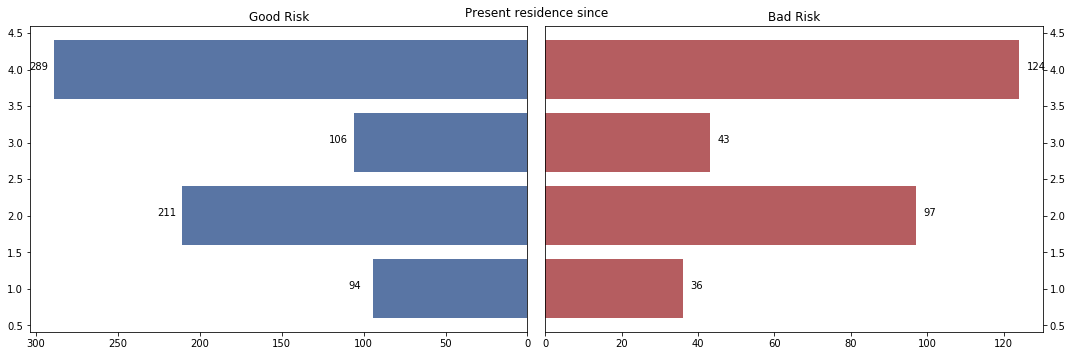

In [20]:
visualize_distribution("Present residence since")

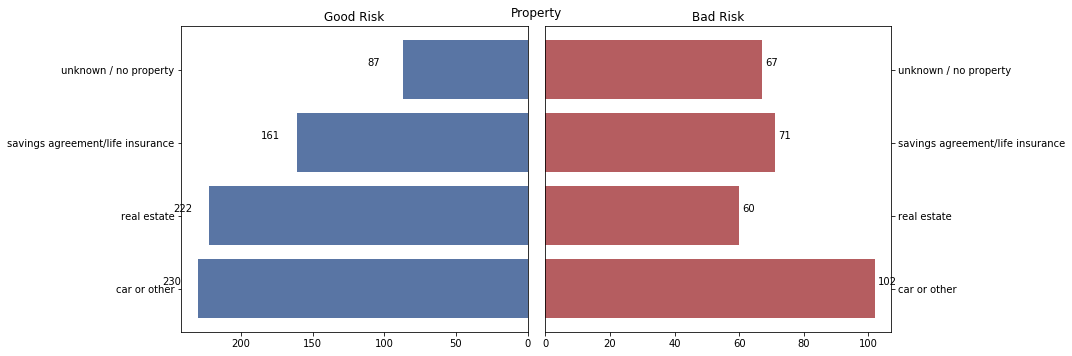

In [21]:
visualize_distribution("Property")

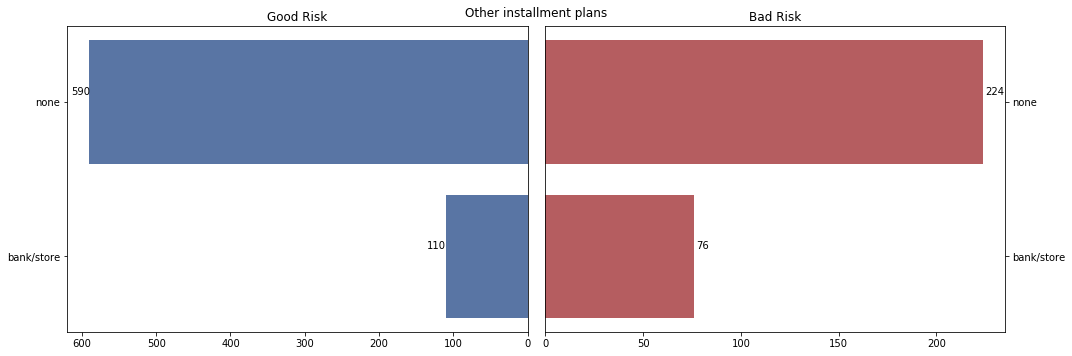

In [22]:
visualize_distribution("Other installment plans")

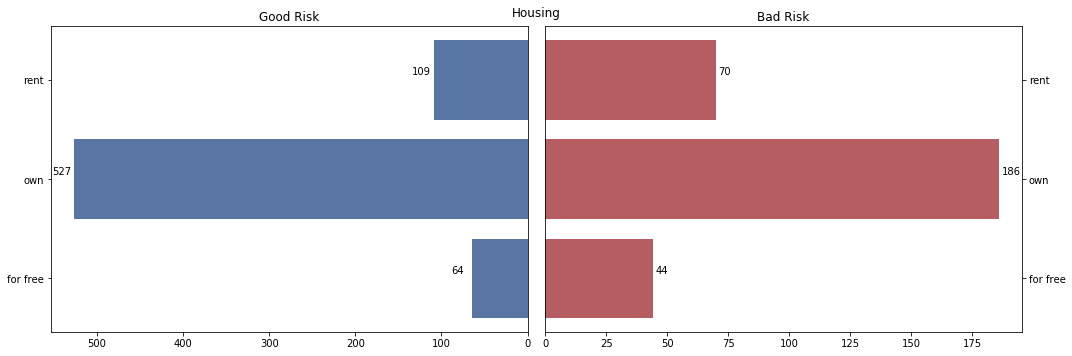

In [23]:
visualize_distribution("Housing")

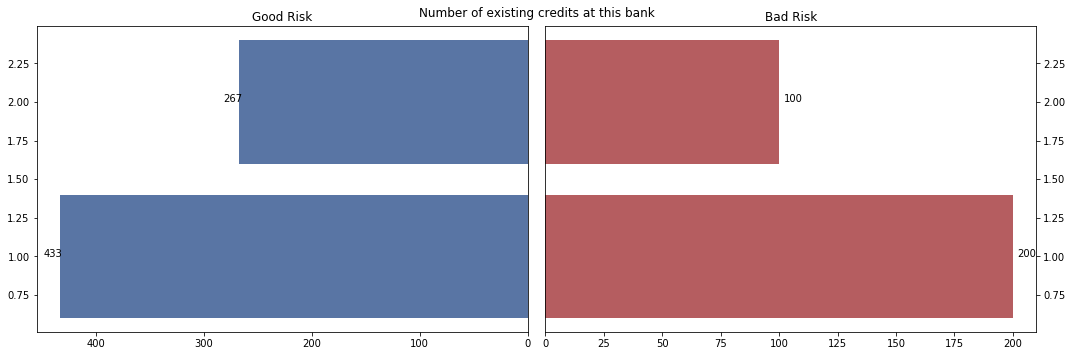

In [24]:
visualize_distribution("Number of existing credits at this bank")

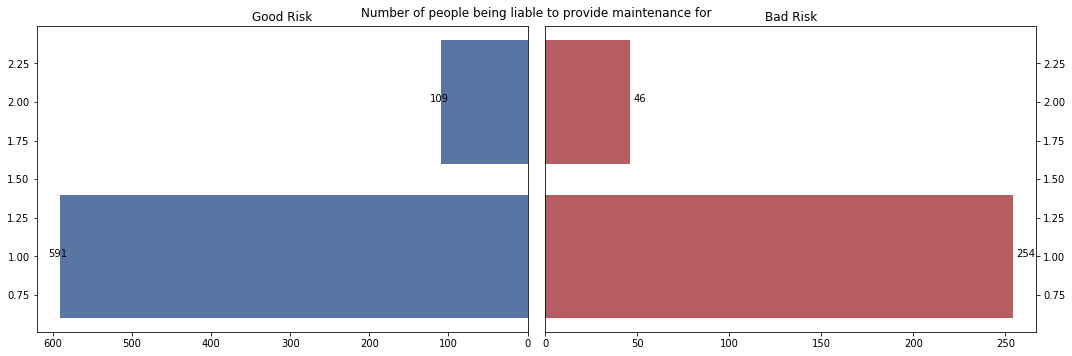

In [25]:
visualize_distribution("Number of people being liable to provide maintenance for")

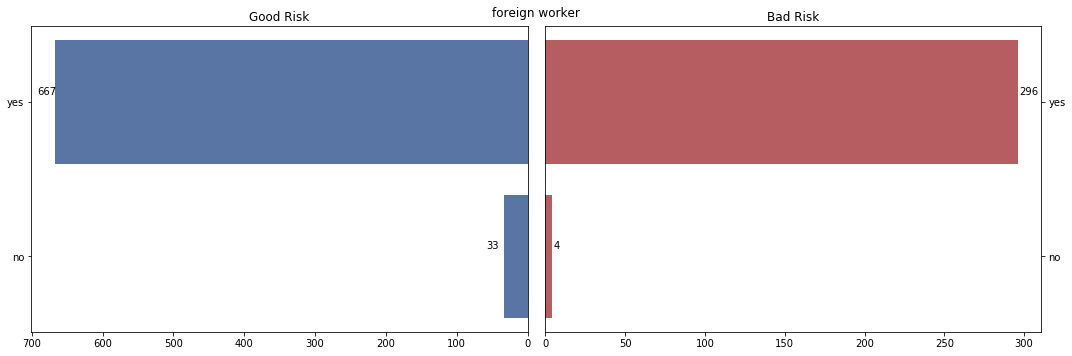

In [26]:
visualize_distribution("foreign worker")

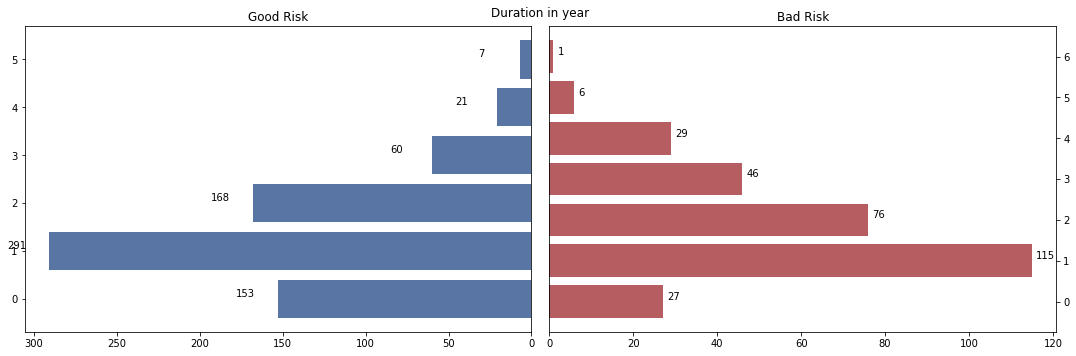

In [27]:
df["Duration in year"]=df["Duration in month"].apply(lambda x: (floor(x/12)))
visualize_distribution("Duration in year")

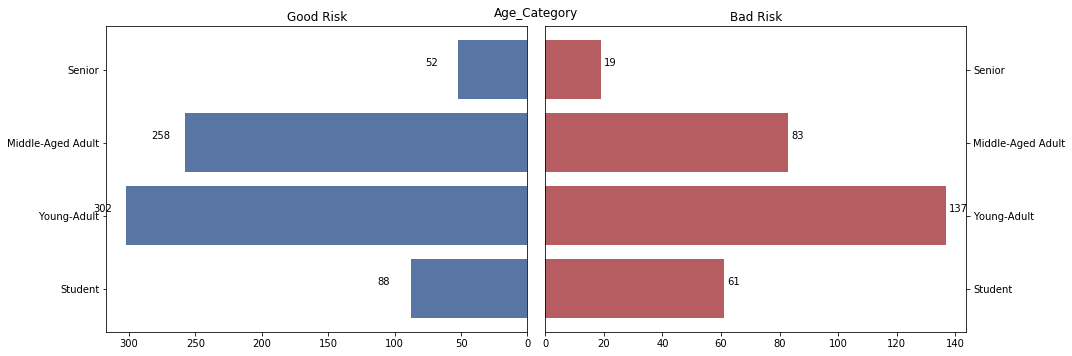

In [28]:
age_interval = [18, 24, 35, 55, 120]
age_category = ['Student', 'Young-Adult', 'Middle-Aged Adult', 'Senior']
df["Age_Category"] = pd.cut(df["Age in years"], age_interval, labels=age_category)
visualize_distribution("Age_Category")

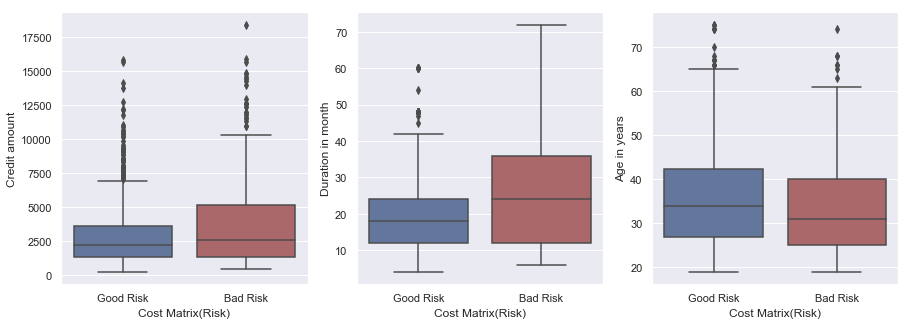

In [29]:
#checking of box plot 
sns.set()
f, axes = plt.subplots(1, 3,figsize=(15,5))
sns.boxplot(y=df["Credit amount"],x=df["Cost Matrix(Risk)"],orient='v' , ax=axes[0],palette=["#5975A4","#B55D60"]) #box plot
sns.boxplot(y=df["Duration in month"],x=df["Cost Matrix(Risk)"], orient='v' , ax=axes[1],palette=["#5975A4","#B55D60"]) #box plot
sns.boxplot(y=df["Age in years"],x=df["Cost Matrix(Risk)"], orient='v' , ax=axes[2],palette=["#5975A4","#B55D60"]) #box plot
plt.show()

In [30]:
column_names_cat_stats=["Status of existing checking account","Credit history","Purpose",\
"Savings account/bonds","Present employment since",\
"Installment rate in percentage of disposable income","Personal status and sex",\
"Other debtors / guarantors","Present residence since","Property",\
"Other installment plans","Housing","Number of existing credits at this bank",\
"Job","Number of people being liable to provide maintenance for","Telephone","foreign worker"]

statistical_significance=[]
for attr in column_names_cat_stats:
    data_count=pd.crosstab(df[attr],df["Cost Matrix(Risk)"]).reset_index()
    obs=np.asarray(data_count[["Bad Risk","Good Risk"]])
    chi2, p, dof, expected = stats.chi2_contingency(obs)
    statistical_significance.append([attr,round(p,6)])
statistical_significance=pd.DataFrame(statistical_significance)
statistical_significance.columns=["Attribute","P-value"]
display(statistical_significance.style.apply(style_stats_specific_cell, axis=None))


statistical_significance=[]
column_names_cont_stats=["Credit amount","Age in years","Duration in month"]
good_risk_df = df[df["Cost Matrix(Risk)"]=="Good Risk"]
bad_risk_df = df[df["Cost Matrix(Risk)"]=="Bad Risk"]
for attr in column_names_cont_stats:
    statistic, p=stats.f_oneway(good_risk_df[attr].values,bad_risk_df[attr].values)
    statistical_significance.append([attr,round(p,6)])
statistical_significance=pd.DataFrame(statistical_significance)
statistical_significance.columns=["Attribute","P-value"]
display(statistical_significance.style.apply(style_stats_specific_cell, axis=None))

,Attribute,P-value
0,Status of existing checking account,0
1,Credit history,0
2,Purpose,5e-05
3,Savings account/bonds,0
4,Present employment since,0.000422
5,Installment rate in percentage of disposable income,0.140033
6,Personal status and sex,0.02074
7,Other debtors / guarantors,0.924283
8,Present residence since,0.861552
9,Property,2.9e-05


,Attribute,P-value
0,Credit amount,1e-06
1,Age in years,0.003925
2,Duration in month,0


In [31]:
attr_significant=["Status of existing checking account","Credit history","Purpose",\
"Savings account/bonds","Present employment since",\
"Personal status and sex","Property","Other installment plans","Housing","foreign worker",\
"Credit amount","Age in years","Duration in month"]
target_variable=["Cost Matrix(Risk)"]
df=df[attr_significant+target_variable]

In [32]:
col_cat_names=["Status of existing checking account","Credit history","Purpose",\
"Savings account/bonds","Present employment since",\
"Personal status and sex","Property","Other installment plans","Housing","foreign worker"]
for attr in col_cat_names:
    df = df.merge(pd.get_dummies(df[attr], prefix=attr), left_index=True, right_index=True)
    df.drop(attr,axis=1,inplace=True)
 
#converting target variable into numeric
risk={"Good Risk":1, "Bad Risk":0}
df["Cost Matrix(Risk)"]=df["Cost Matrix(Risk)"].map(risk)

In [33]:
df.head()

,Credit amount,Age in years,Duration in month,Cost Matrix(Risk),Status of existing checking account_<0 DM,Status of existing checking account_>0 DM,Status of existing checking account_no checking account,Credit history_all credit / existing credits paid back duly till now,Credit history_critical account/delay in paying off,Credit history_no credits taken,Purpose_Home Related,Purpose_car (new),Purpose_car (used),Purpose_others,Savings account/bonds_<100 DM,Savings account/bonds_<500 DM,Savings account/bonds_>500 DM,Savings account/bonds_no savings account,Present employment since_1<= < 4 years,Present employment since_4<= <7 years,Present employment since_<1 years,Present employment since_>=7 years,Personal status and sex_female,Personal status and sex_male,Property_car or other,Property_real estate,Property_savings agreement/life insurance,Property_unknown / no property,Other installment plans_bank/store,Other installment plans_none,Housing_for free,Housing_own,Housing_rent,foreign worker_no,foreign worker_yes
0,1169,67,6,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1
1,5951,22,48,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1
2,2096,49,12,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1
3,7882,45,42,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1
4,4870,53,24,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1


In [34]:
#principle component analysis
X = df.drop('Cost Matrix(Risk)', 1).values #independent variables
y = df["Cost Matrix(Risk)"].values #target variables

pca = PCA(n_components=16)
X = pca.fit_transform(X)

In [35]:
# Spliting dataset into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=0)

# 1) XGBoost Model

In [39]:
# model building XGboost
model=XGBClassifier()

In [48]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
print(list(zip(y_test,predictions)))

[(1, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 1), (1, 0), (1, 1), (1, 0), (1, 1), (1, 0), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 1), (0, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 0), (0, 1), (1, 0), (1, 1), (1, 1), (1, 1), (0, 0), (0, 1), (1, 1), (1, 1), (1, 1), (0, 1), (0, 0), (1, 1), (1, 1), (0, 1), (1, 1), (1, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 0), (0, 1), (1, 1), (0, 1), (0, 1), (1, 1), (1, 0), (1, 1), (1, 1), (1, 0), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1),

In [37]:
# checking the accuracy
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy: ")
print(round(accuracy_score(y_test,y_pred)*100,2))

Accuracy: 
79.67


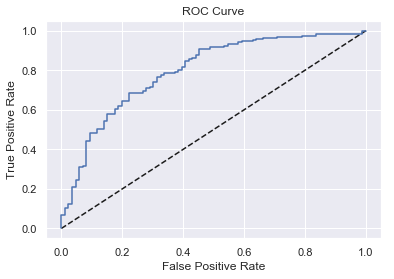

In [38]:
# generating the ROC curve
y_pred_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# 2) Logistic Regression Model

In [40]:
from sklearn.linear_model import LogisticRegression
#create a model
classifier=(LogisticRegression())
#fitting training data to the model
classifier.fit(X_train,y_train)

Y_pred=classifier.predict(X_test)
print(list(zip(y_test,Y_pred)))

[(1, 0), (1, 1), (1, 1), (1, 1), (1, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 0), (0, 0), (1, 1), (1, 1), (0, 1), (1, 0), (1, 1), (1, 0), (1, 0), (1, 0), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 1), (0, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 0), (1, 1), (1, 1), (1, 1), (0, 0), (0, 1), (1, 0), (1, 1), (1, 1), (0, 1), (0, 0), (1, 1), (1, 1), (0, 1), (1, 1), (1, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 0), (1, 1), (1, 0), (0, 1), (1, 1), (0, 1), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 0), (1, 1), (1, 1), (0, 1), (1, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 1), (1, 1), (1, 0), (1, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 1), (1, 1), (1, 1), (0, 0), (1, 1),

D:\SOFTWARE\ANACONDA3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [41]:
new_Df=pd.DataFrame(data=[y_test,Y_pred])

In [42]:
new_Df=new_Df.transpose()


In [43]:
new_Df.head()

,0,1
0,1,0
1,1,1
2,1,1
3,1,1
4,1,0


In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(y_test,Y_pred))

acc=accuracy_score(y_test, Y_pred)
print("Accuracy of the model: ",acc)


[[ 44  42]
 [ 40 174]]
Classification report: 
              precision    recall  f1-score   support

           0       0.52      0.51      0.52        86
           1       0.81      0.81      0.81       214

   micro avg       0.73      0.73      0.73       300
   macro avg       0.66      0.66      0.66       300
weighted avg       0.72      0.73      0.73       300

Accuracy of the model:  0.7266666666666667


# 3) Decision Tree Model

In [45]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree = DecisionTreeClassifier()
model_DecisionTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [46]:
#fit the model on the data and predict the values
Y_pred = model_DecisionTree.predict(X_test)
#print(Y_pred)
print(list(zip(y_test,Y_pred)))

[(1, 0), (1, 1), (1, 1), (1, 0), (1, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 1), (0, 1), (1, 1), (1, 1), (0, 0), (1, 0), (1, 0), (0, 0), (1, 1), (1, 1), (1, 0), (1, 1), (1, 0), (1, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 0), (1, 1), (0, 1), (0, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 1), (1, 0), (0, 1), (1, 0), (1, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (1, 0), (1, 1), (0, 1), (0, 1), (1, 0), (1, 1), (0, 1), (1, 0), (1, 0), (1, 0), (1, 1), (1, 1), (0, 0), (1, 1), (1, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 1), (0, 1), (1, 1), (1, 1), (1, 1), (1, 0), (1, 0), (1, 0), (0, 1), (1, 1), (0, 1), (0, 1), (1, 1), (1, 0), (1, 1), (1, 1), (1, 0), (1, 1), (1, 1), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 0), (1, 1), (1, 1), (0, 1), (1, 1), (1, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (1, 0), (1, 1), (0, 0), (1, 1), (1, 0), (1, 0), (0, 0), (1, 1), (1, 0), (0, 0), (1, 1),

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
#confusion matrix
print(confusion_matrix(y_test,Y_pred))
print(accuracy_score(y_test,Y_pred))
print(classification_report(y_test,Y_pred))

[[ 41  45]
 [ 64 150]]
0.6366666666666667
              precision    recall  f1-score   support

           0       0.39      0.48      0.43        86
           1       0.77      0.70      0.73       214

   micro avg       0.64      0.64      0.64       300
   macro avg       0.58      0.59      0.58       300
weighted avg       0.66      0.64      0.65       300



ACCURACY OF THE ALL THE CLASSIFICATION MODELS
1) XGBOOST :- 79.67
2) LOGISTIC REGRESSION :- 0.7266666666666667
3) DECISION TREE :- 0.6366666666666667
SO THE BEST MODEL WITH BEST PREDICTION WAS XGBOOST.